# Notebook

This notebook will track progress on my EngSci Thesis on Quantum Computing

# Resources

This section will contain some of most helpful resources, and will be continually updated.

- Qiskit documentation: https://qiskit.org/documentation/
- Quantum gates: https://quantum-computing.ibm.com/support/guides/gate-overview


# Project

In [44]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import IBMQ, Aer

apiFile = 'qiskitKey.txt'
with open(apiFile, 'r') as f:
    qiAPItoken = f.readlines()[0]

#IBMQ.save_account(qiAPItoken)
#IBMQ.enable_account(qiAPItoken)

if False: #view qiskit version details
    #qiskit.__version__
    qiskit.__qiskit_version__

from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers import JobStatus #enum for status of jobs
import qiskit.tools.jupyter 

simulator = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator
provider = IBMQ.load_account()
backend = provider.get_backend(name='ibmq_16_melbourne')

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]


### Qiskit Intro
The following is the first tutorial with qiskit,
available at: https://qiskit.org/documentation/getting_started.html


In [3]:


# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'11': 516, '00': 484}


## Exponentiating Circuit Modulo N
Circuit shown in Figure 5 of Gamel & James (qubits labelled 0-7 from top)

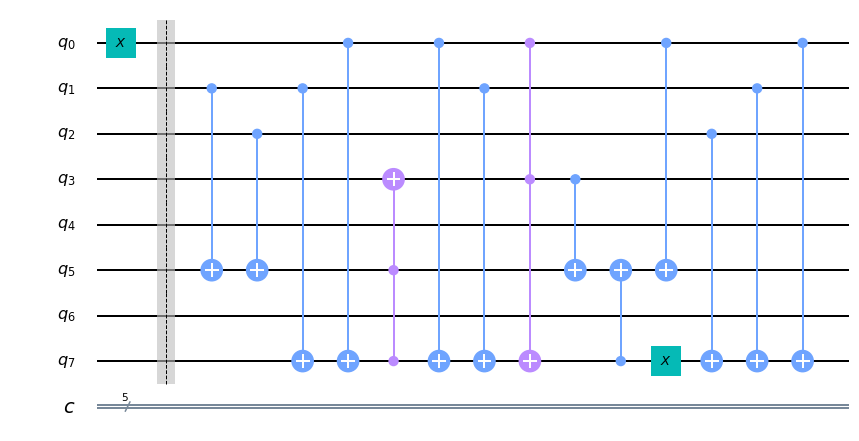

In [47]:
numQubits = 8
numBits = 5 #number of bits in output
circuit = QuantumCircuit(numQubits, numBits)

#for i in range(7):
#    circuit.reset(i)

#initialize 3 input qubits
#circuit.h(2)
#circuit.h(1)
#circuit.h(0)
circuit.x(0)
circuit.barrier()

#Modular Exponentiation
circuit.cx(1, 5) #CNOT
circuit.cx(2, 5)
circuit.cx(1, 7)
circuit.cx(0, 7)
circuit.ccx(5, 7, 3) #Toffoli, target is last qubit
circuit.cx(0, 7)
circuit.cx(1, 7)
circuit.ccx(0, 3, 7)
circuit.cx(3, 5)
circuit.cx(7, 5)
circuit.cx(0, 5)
circuit.x(7) #NOT
circuit.cx(2, 7)
circuit.cx(1, 7)
circuit.cx(0, 7)

# Draw the circuit
circuit.draw(output='mpl')

#print(circuit.qasm())


In [48]:
circuit.measure([3,4,5,6,7], [4,3,2,1,0])

# Execute the circuit on the qasm simulator
job = execute(circuit, backend, shots=1000)

In [46]:
##Running the above circuit on simulator
if True:
    #measure output
    circuit.barrier()
    #circuit.measure([0,1,2], [0,1,2])
    circuit.measure([3,4,5,6,7], [4,3,2,1,0])

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    print("Total count is:", counts)
    print("Execution time:", result.time_taken)


    ##Results
    # input (x_3, x_2, x_1) : result (y_5 ... y_1) 
    # Note: (y_5 ... y_1) come from qubits (q3 ... q7), i.e. q3 -> y5 is most significant bit
    # 000 : 00001
    # 001 : 00100
    # 010 : 10000
    # 011 : 00001
    # 100 : 00100
    # 101 : 10000
    # 110 : 00001
    # 111 : 00100
    #all results (when run on simulator match truth table in paper)


Total count is: {'00100': 1000}
Execution time: 0.006441354751586914


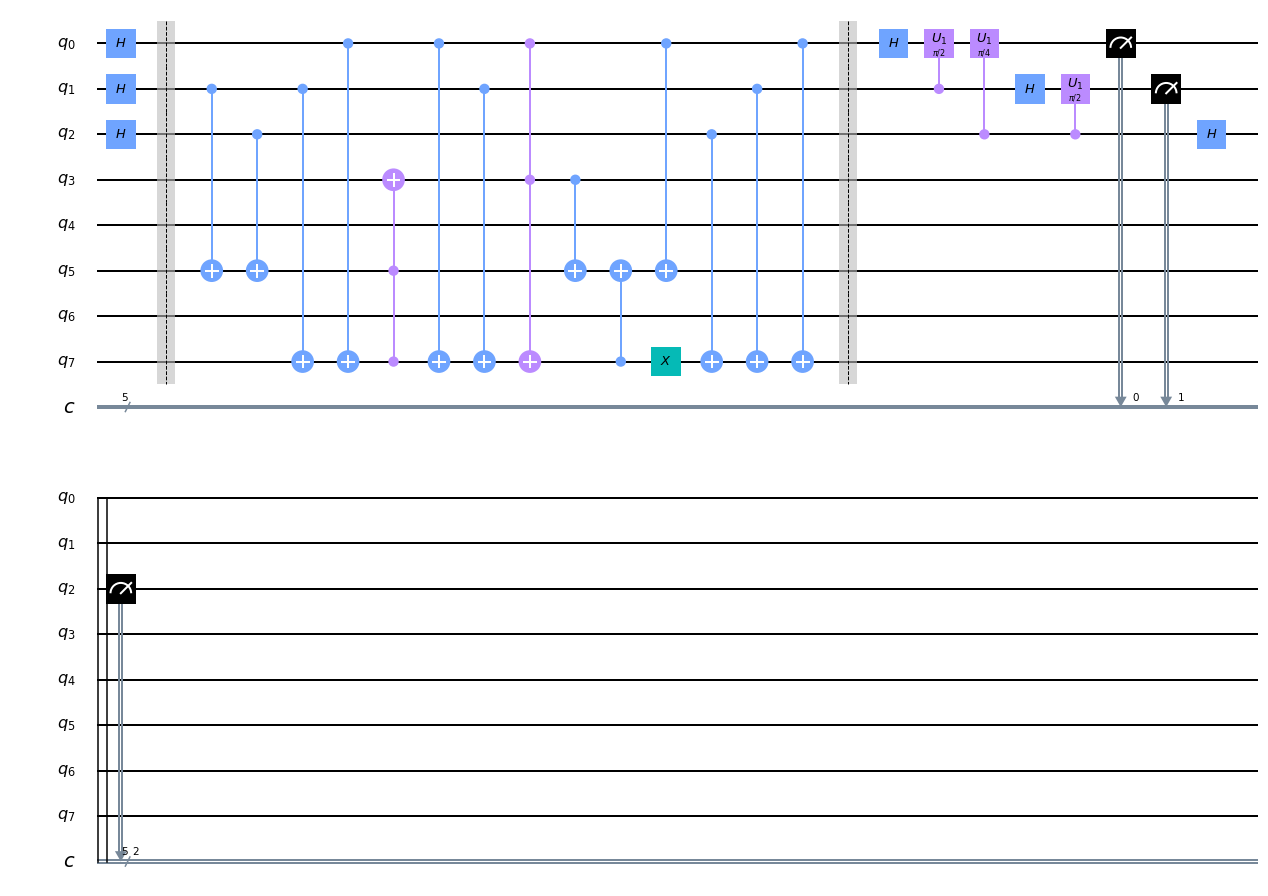

In [27]:
#Quantum Fourier Transform (QFT) 
#see https://community.qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#circuit

circuit.barrier()
circuit.h(0)
circuit.cu1(math.pi/2.0, 1, 0) 
circuit.cu1(math.pi/4.0, 2, 0)
circuit.h(1)
circuit.cu1(math.pi/2.0, 2, 1) 
circuit.h(2)

circuit.measure([0,1,2], [0,1,2])

'''
Applies QFT to output of Exponentiation
circuit.barrier()
#n
circuit.h(3)
circuit.cu1(math.pi/2.0, 4, 3) 
circuit.cu1(math.pi/4.0, 5, 3)
circuit.cu1(math.pi/8.0, 6, 3)
circuit.cu1(math.pi/16.0, 7, 3) 
circuit.barrier()
circuit.h(4)
circuit.cu1(math.pi/2.0, 5, 4) 
circuit.cu1(math.pi/4.0, 6, 4)
circuit.cu1(math.pi/8.0, 7, 4)
circuit.barrier()
circuit.h(5)
circuit.cu1(math.pi/2.0, 6, 5) 
circuit.cu1(math.pi/4.0, 7, 5)
circuit.barrier()
circuit.h(6)
circuit.cu1(math.pi/2.0, 7, 6)
circuit.barrier()
circuit.h(7)

circuit.measure([3,4,5,6,7], [4,3,2,1,0])
'''

circuit.draw(output='mpl')

In [ ]:
#Alternate way to build QFT
def qft(circ, q, k, n):
    """n-qubit QFT on q in circ."""
    for j in range(k, n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
        circ.barrier()

circuit.barrier()
qft(circuit, circuit.qubits, 3, 3+5)
circuit.draw(output='mpl')

Total count is: {'00001': 375049, '00100': 375055, '10000': 249896}
Execution time: 1.7537319660186768
[('00001', 375049), ('00100', 375055), ('10000', 249896)]


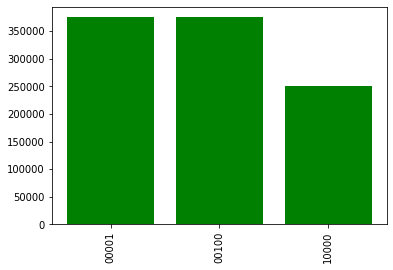

In [40]:
##Running the above circuit on simulator

#measure output
circuit.barrier()
#circuit.measure([3,4,5,6,7], [4,3,2,1,0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("Total count is:", counts)
print("Execution time:", result.time_taken)
sortedCounts = sorted(counts.items())
print(sortedCounts)

plt.bar([sortedCounts[k][0] for k in range(len(sortedCounts))], [sortedCounts[k][1] for k in range(len(sortedCounts))], color='g')
#plt.bar([sortedCounts[k,0] for k in range(len(sortedCounts))], counts.values(), color='g')
_ = plt.xticks(rotation='vertical')

In [33]:
##Running the above circuit on quantum backend
%qiskit_job_watcher
#qobj = compile(circuit, backend, shots=2000)
#job = backend.run(qobj)
job = execute(circuit, backend, shots=1000)
'''
start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job.queue_position()}')
    time.sleep(10)
    job_status = job.status()

result = job.result()
print(result.get_counts())
'''

Accordion(children=(VBox(layout=Layout(max_width='610px', min_width='610px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

"\nstart_time = time.time()\njob_status = job.status()\nwhile job_status not in JOB_FINAL_STATES:\n    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'\n          f' est. queue position: {job.queue_position()}')\n    time.sleep(10)\n    job_status = job.status()\n\nresult = job.result()\nprint(result.get_counts())\n"

JobStatus.DONE
Total count is: {'11101': 4, '10000': 57, '00110': 15, '01000': 22, '10110': 1, '11100': 3, '00101': 152, '01001': 9, '01100': 15, '00000': 202, '00001': 153, '00010': 6, '01101': 15, '10010': 2, '00011': 6, '10011': 2, '10101': 38, '00100': 198, '00111': 8, '11111': 2, '11001': 1, '01010': 4, '10100': 45, '11000': 6, '10001': 34}


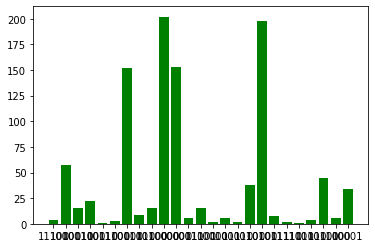

In [49]:
print(job.status())
import matplotlib.pyplot as plt
if job.status() == JobStatus.DONE:
    result = job.result()
    
    counts = result.get_counts(circuit)
    print("Total count is:", counts)
    #print("Execution time:", result.time_taken)
    
    plt.bar(counts.keys(), counts.values(), color='g')

In [ ]:
#Testing just a QFT



import math

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram





def input_state(circ, q, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(-math.pi/float(2**(j)), q[j])
        
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
        circ.barrier()



q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qft3 = QuantumCircuit(q, c)

# first, prepare the state that should return 001 and draw that circuit
input_state(qft3, q, 3)

qft3.draw(output='mpl')



# next, do a qft on the prepared state and draw the entire circuit
qft(qft3, q, 3)
for i in range(3):
    qft3.measure(q[i], c[i])
    
qft3.draw(output='mpl')

# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qft3, backend=backend, shots=1024).result()
simulate.get_counts()



In [35]:
backend.properties()

BackendProperties(backend_name='ibmq_16_melbourne', backend_version='1.0.0', gates=[Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 11, 19, 7, 26, 41, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[0]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 11, 19, 7, 26, 41, tzinfo=tzutc()), name='gate_error', unit='', value=0.003740964441290906)], qubits=[0]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 11, 19, 7, 26, 41, tzinfo=tzutc()), name='gate_error', unit='', value=0.007481928882581812)], qubits=[0]), Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 11, 19, 7, 26, 41, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[1]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 11, 19, 7, 26, 41, tzinfo=tzutc()), name='gate_error', unit='', value=0.00731559018175304)], qubits=[1]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 11, 19, 7, 26, 41, tzinfo=tzutc()), name='ga